# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
#! pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559686 sha256=ddd7a89ab9ab3b6630e63fd1b48343e1fe731ffcc7668c29194a5166920897f2
  Stored in directory: c:\users\panth\appdata\local\pip\cache\wheels\d9\dd\68\8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy


In [4]:
#weather_api_key = 'b4662837a48a5642ae9f808cca9af43d'


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)  #1500 latitude values between -90 and 90
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) #1500 longitude values between -90 and 90
lat_lngs = zip(lats, lngs)  #zip will allow you to iterate on lat_lngs as tuples from values of each 

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name #returns the city name of the nearest city

    # If the city is unique, then add it to a our cities list (if there was a lat, lng point that have the same nearest city)
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


In [6]:
cities

['vanimo',
 'quatre cocos',
 'vaini',
 'port elizabeth',
 'busselton',
 'marcona',
 'mayo',
 'ahipara',
 'albany',
 'butaritari',
 'ushuaia',
 'kyra',
 'port blair',
 'bredasdorp',
 'lebu',
 'luderitz',
 'hermanus',
 'kodiak',
 'uvelskiy',
 'rikitea',
 'tucurui',
 'port alfred',
 'ndende',
 'puerto ayora',
 'ginda',
 'chokurdakh',
 'belushya guba',
 'punta arenas',
 'yanan',
 'sanmenxia',
 'sofiysk',
 'los llanos de aridane',
 'qaanaaq',
 'horsham',
 'bluff',
 'provideniya',
 'jilmah',
 'atuona',
 'nanzhou',
 'pointe michel',
 'nikolskoye',
 'nanortalik',
 'kyzyl-suu',
 'yellowknife',
 'jamestown',
 'kermanshah',
 'tuktoyaktuk',
 'mataura',
 'mlandizi',
 'sao filipe',
 'kruisfontein',
 'taolanaro',
 'honningsvag',
 'san patricio',
 'dikson',
 'carnarvon',
 'azimur',
 'nautla',
 'skibbereen',
 'ugoofaaru',
 'tambovka',
 'pisco',
 'paamiut',
 'anadyr',
 'namibe',
 'hilo',
 'henties bay',
 'arraial do cabo',
 'kichera',
 'tasiilaq',
 'new norfolk',
 'lasa',
 'ponta do sol',
 'dodge city',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL

#url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key + "&q=" +  'olinda'
#url

'http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=b4662837a48a5642ae9f808cca9af43d&q=olinda'

In [28]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
 
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lon']
        city_lng = city_weather['coord']['lat']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vanimo
Processing Record 2 of Set 1 | quatre cocos
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | marcona
City not found. Skipping...
Processing Record 7 of Set 1 | mayo
Processing Record 8 of Set 1 | ahipara
City not found. Skipping...
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | kyra
Processing Record 13 of Set 1 | port blair
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | uvelskiy
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | tucurui
Processing Record 22 of Set 1 | port alfr

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
#city_data_df.head()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vanimo,141.3028,-2.6741,25.27,87,100,1.41,PG,1674251436
1,quatre cocos,57.7625,-20.2078,25.06,89,100,2.84,MU,1674251437
2,vaini,-175.2000,-21.2000,30.09,84,75,4.12,TO,1674251437
3,port elizabeth,25.5701,-33.9180,23.39,92,75,2.57,ZA,1674251345
4,busselton,115.3333,-33.6500,20.08,55,0,5.66,AU,1674251438


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vanimo,141.3028,-2.6741,25.27,87,100,1.41,PG,1674251436
1,quatre cocos,57.7625,-20.2078,25.06,89,100,2.84,MU,1674251437
2,vaini,-175.2000,-21.2000,30.09,84,75,4.12,TO,1674251437
3,port elizabeth,25.5701,-33.9180,23.39,92,75,2.57,ZA,1674251345
4,busselton,115.3333,-33.6500,20.08,55,0,5.66,AU,1674251438


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

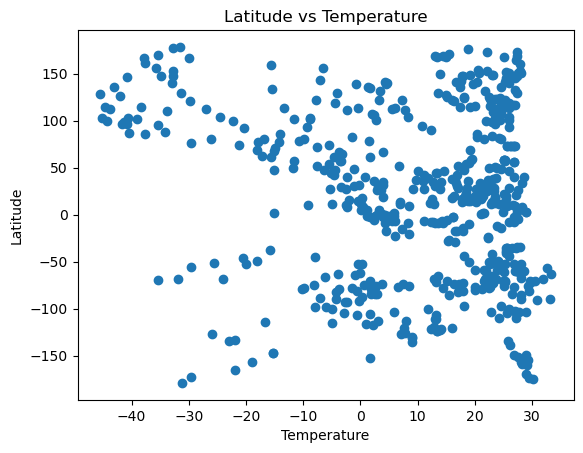

In [12]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.title("Latitude vs Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

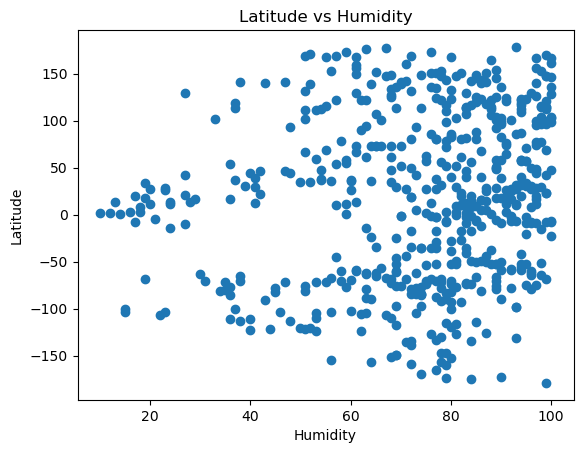

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

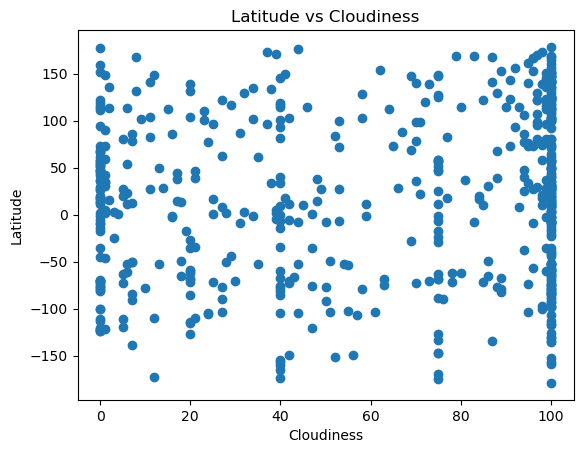

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

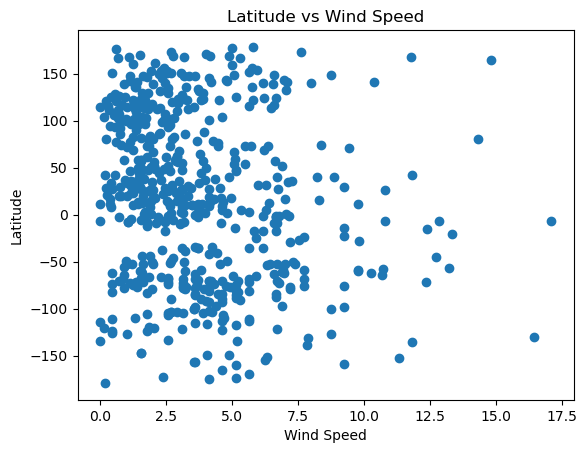

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.title("Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, xlabel, ylabel, pos_line, pos_r):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,pos_line,fontsize=15,color="red")
    plt.annotate(f"The r-squared is: {rvalue**2}",pos_r,fontsize=10,color="black")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vanimo,141.3028,-2.6741,25.27,87,100,1.41,PG,1674251436
1,quatre cocos,57.7625,-20.2078,25.06,89,100,2.84,MU,1674251437
3,port elizabeth,25.5701,-33.9180,23.39,92,75,2.57,ZA,1674251345
4,busselton,115.3333,-33.6500,20.08,55,0,5.66,AU,1674251438
6,ahipara,173.1667,-35.1667,22.08,59,98,2.70,NZ,1674251439


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,vaini,-175.2000,-21.2000,30.09,84,75,4.12,TO,1674251437
5,mayo,-76.5119,38.8876,8.49,51,40,7.72,US,1674251439
7,albany,-73.9662,42.6001,3.71,83,100,0.45,US,1674251439
9,ushuaia,-68.3000,-54.8000,12.81,71,75,7.72,AR,1674251341
13,lebu,-73.6500,-37.6167,17.28,75,0,4.33,CL,1674251216


###  Temperature vs. Latitude Linear Regression Plot

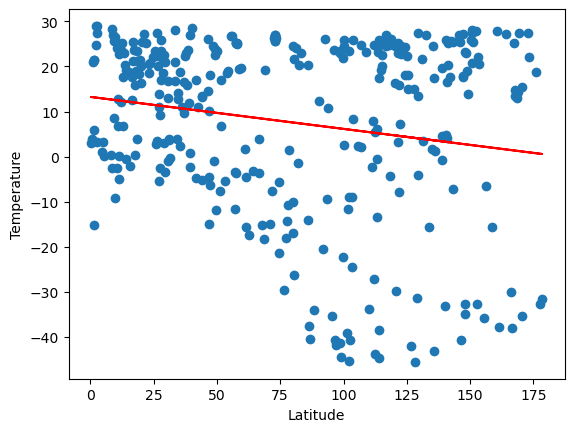

In [19]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Temperature', (25, 230), (0, 225) )

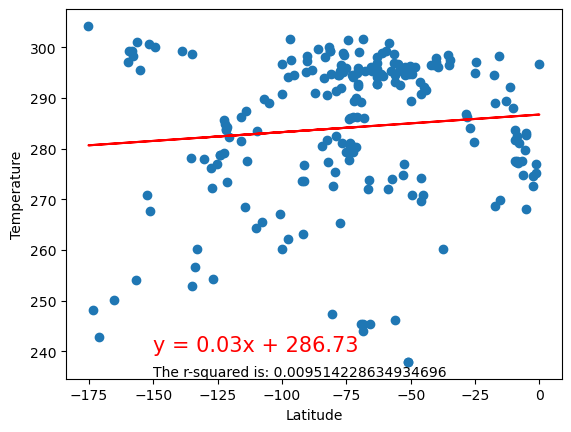

In [68]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Temperature', (-150, 240), (-150, 235))

**Discussion about the linear relationship:**

The top plot shows that the northern hemisphere data points of the temp vs latitude do not have a strong correlation of any kind. The linear regression line (which is calc by avg value between each point) is basically flat w the slope being -0.02 which is another indication of these 2 vars not having strong correlation. 

The bottom plot shows that the southern hemisphere data points of the temp vs latitude do not have a strong correlation of any kind. The linear regression line (which is calc by avg value between each point) is basically flat w the slope being 0.03 which is another indication of these 2 vars not having strong correlation. 

### Humidity vs. Latitude Linear Regression Plot

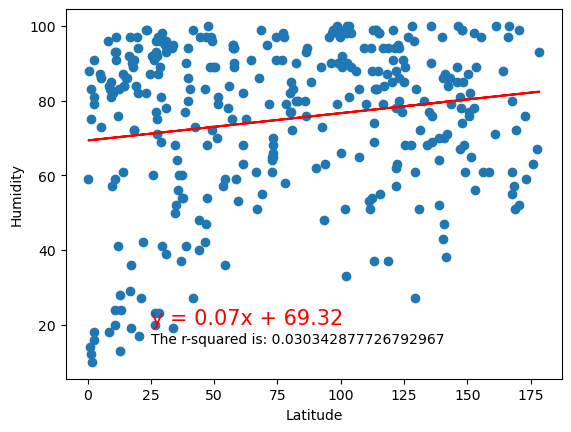

In [20]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity', (25, 20), (25, 15) )

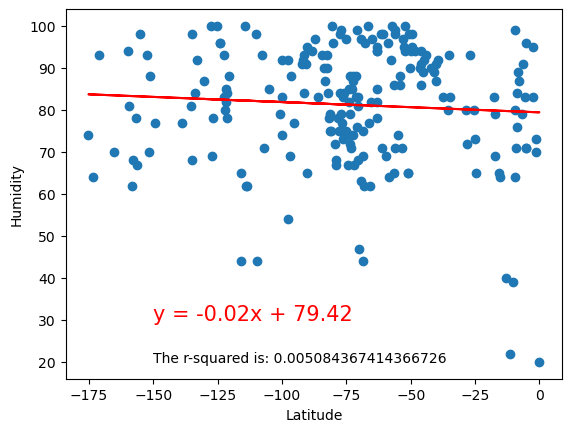

In [72]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity', (-150, 30), (-150, 20))

**Discussion about the linear relationship:** 

The top plot shows that the northern hemisphere data points of the humidity vs latitude have a very slight negative correlation. The linear regression line (which is calc by avg value between each point) is slightly sloped with m = -0.02 which is another indication of these 2 vars having a slightly negative correlation. 

The bottom plot shows that the southern hemisphere data points of the humidity vs latitude do not have a strong correlation of any kind. The linear regression line (which is calc by avg value between each point) is basically flat w the slope being 0.03 which is another indication of these 2 vars not having strong correlation. 


### Cloudiness vs. Latitude Linear Regression Plot

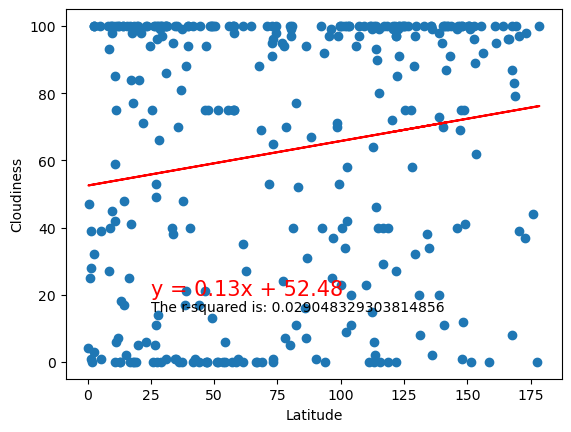

In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (25, 20), (25, 15) )

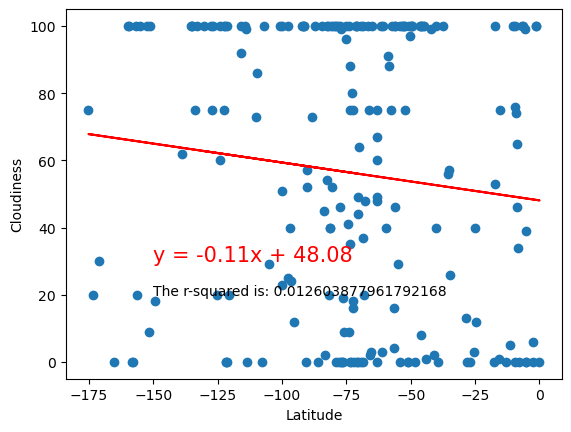

In [74]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness', (-150, 30), (-150, 20))

**Discussion about the linear relationship:** 

The top plot shows that the northern hemisphere data points of the cloudiness vs latitude have a slight positive correlation. The linear regression line (which is calc by avg value between each point) is slightly sloped with m = 0.07 which is another indication of these 2 vars having a slightly positive correlation. 

The bottom plot shows that the southern hemisphere data points of the cloudiness vs latitude do not have a slight negative correlation. The linear regression line (which is calc by avg value between each point) is slightly sloped with m = -0.11 which is another indication of these 2 vars not having a slightly negative correlation. 


### Wind Speed vs. Latitude Linear Regression Plot

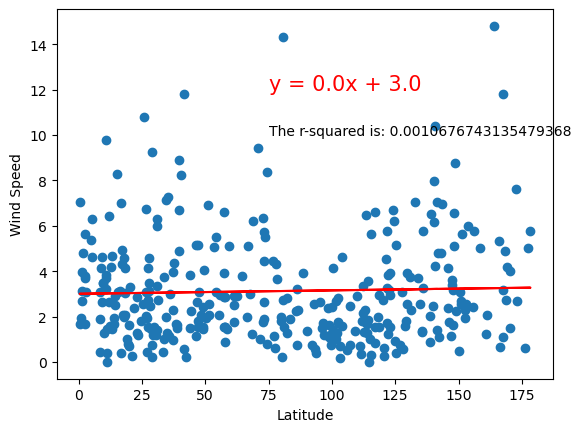

In [22]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (75, 12), (75, 10) )

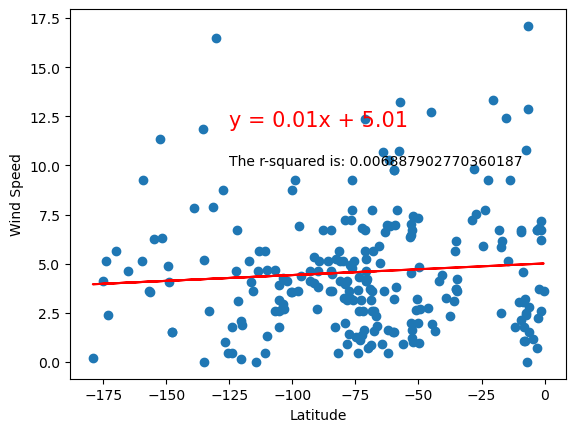

In [23]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed', (-125, 12), (-125, 10))

**Discussion about the linear relationship:** 

The top plot shows that the northern hemisphere data points of the wind speed vs latitude do not have a strong correlation of any kind. The linear regression line (which is calc by avg value between each point) is basically flat w the slope being 0.01 which is another indication of these 2 vars not having strong correlation. 

The bottom plot shows that the southern hemisphere data points of the wind speed vs latitude do not have a strong correlation of any kind. The linear regression line (which is calc by avg value between each point) is basically flat w the slope being 0.01 which is another indication of these 2 vars not having strong correlation. 
